In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-data/ifood_df.csv
/kaggle/input/marketing-data/dictionary.png


# Load Data

In [2]:
df = pd.read_csv("/kaggle/input/marketing-data/ifood_df.csv")

In [3]:
# Display first few rows of the dataset
df.head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
5,62513.0,0,1,16,520,42,98,0,42,14,...,1,0,0,0,0,1,0,702,688,0
6,55635.0,0,1,34,235,65,164,50,49,27,...,0,0,0,0,1,0,0,563,536,0
7,33454.0,1,0,32,76,10,56,3,1,23,...,0,0,0,0,0,0,1,146,123,0
8,30351.0,1,0,19,14,0,24,3,3,2,...,1,0,0,0,0,0,1,44,42,0
9,5648.0,1,1,68,28,0,6,1,1,13,...,1,0,0,0,0,0,1,36,23,1


In [4]:
# Get a concise summary of the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [5]:
# Display mean for all varibales
df.mean()

Income                  51622.094785
Kidhome                     0.442177
Teenhome                    0.506576
Recency                    49.009070
MntWines                  306.164626
MntFruits                  26.403175
MntMeatProducts           165.312018
MntFishProducts            37.756463
MntSweetProducts           27.128345
MntGoldProds               44.057143
NumDealsPurchases           2.318367
NumWebPurchases             4.100680
NumCatalogPurchases         2.645351
NumStorePurchases           5.823583
NumWebVisitsMonth           5.336961
AcceptedCmp3                0.073923
AcceptedCmp4                0.074376
AcceptedCmp5                0.073016
AcceptedCmp1                0.064399
AcceptedCmp2                0.013605
Complain                    0.009070
Z_CostContact               3.000000
Z_Revenue                  11.000000
Response                    0.151020
Age                        51.095692
Customer_Days            2512.718367
marital_Divorced            0.104308
m

In [6]:
# Display basic statistical details
df.describe()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [7]:
# Display basic statistical details
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
Kidhome,2205.0,0.442177,0.537132,0.0,0.0,0.0,1.0,2.0
Teenhome,2205.0,0.506576,0.544380,0.0,0.0,0.0,1.0,2.0
Recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
MntWines,2205.0,306.164626,337.493839,0.0,24.0,178.0,507.0,1493.0
MntFruits,2205.0,26.403175,39.784484,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2205.0,165.312018,217.784507,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2205.0,37.756463,54.824635,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2205.0,27.128345,41.130468,0.0,1.0,8.0,34.0,262.0
MntGoldProds,2205.0,44.057143,51.736211,0.0,9.0,25.0,56.0,321.0


In [8]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the number of missing values for each column
print(missing_values)


Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [9]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)


<Axes: >

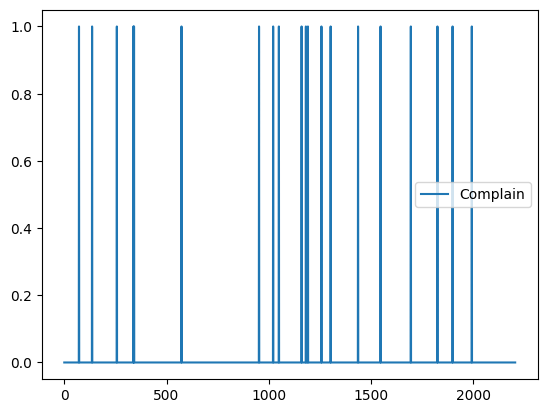

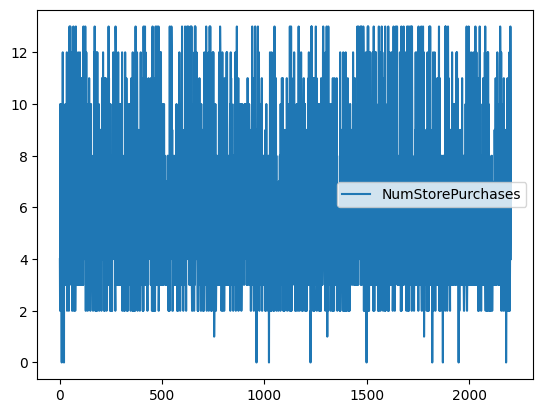

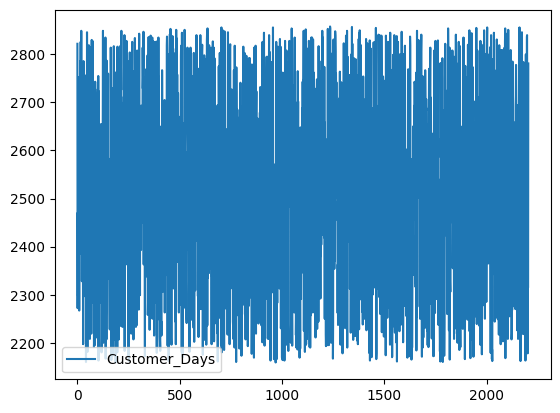

In [10]:
df[["Complain"]].plot()
df[["NumStorePurchases"]].plot()
df[["Customer_Days"]].plot()

In [11]:
df['Kidhome'] = df['Kidhome'].astype('category')
df['Teenhome'] = df['Teenhome'].astype('category')
df['AcceptedCmp1'] = df['AcceptedCmp1'].astype('category')
df['AcceptedCmp2'] = df['AcceptedCmp2'].astype('category')
df['AcceptedCmp3'] = df['AcceptedCmp3'].astype('category')
df['AcceptedCmp4'] = df['AcceptedCmp4'].astype('category')
df['AcceptedCmp5'] = df['AcceptedCmp5'].astype('category')
df['Complain'] = df['Complain'].astype('category')
df['marital_Divorced'] = df['marital_Divorced'].astype('category')
df['marital_Married'] = df['marital_Married'].astype('category')
df['marital_Single'] = df['marital_Single'].astype('category')
df['marital_Together'] = df['marital_Together'].astype('category')
df['marital_Widow'] = df['marital_Widow'].astype('category')
df['education_2n Cycle'] = df['education_2n Cycle'].astype('category')
df['education_Basic'] = df['education_Basic'].astype('category')
df['education_Graduation'] = df['education_Graduation'].astype('category')
df['education_Master'] = df['education_Master'].astype('category')
df['education_PhD'] = df['education_PhD'].astype('category')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Income                2205 non-null   float64 
 1   Kidhome               2205 non-null   category
 2   Teenhome              2205 non-null   category
 3   Recency               2205 non-null   int64   
 4   MntWines              2205 non-null   int64   
 5   MntFruits             2205 non-null   int64   
 6   MntMeatProducts       2205 non-null   int64   
 7   MntFishProducts       2205 non-null   int64   
 8   MntSweetProducts      2205 non-null   int64   
 9   MntGoldProds          2205 non-null   int64   
 10  NumDealsPurchases     2205 non-null   int64   
 11  NumWebPurchases       2205 non-null   int64   
 12  NumCatalogPurchases   2205 non-null   int64   
 13  NumStorePurchases     2205 non-null   int64   
 14  NumWebVisitsMonth     2205 non-null   int64   
 15  Acce

# Visualizations

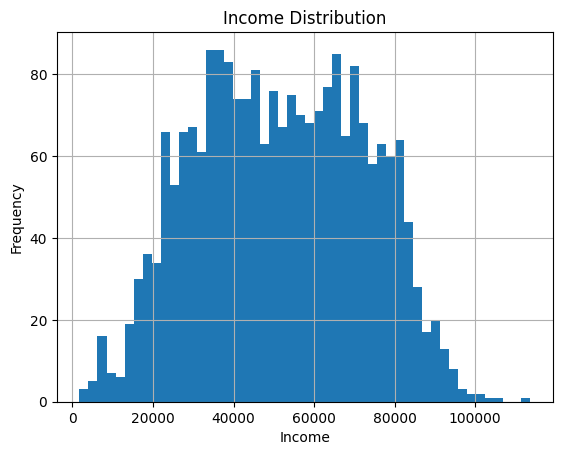

In [13]:
import matplotlib.pyplot as plt

# Plotting a histogram for the 'Income' column
df['Income'].hist(bins=50)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


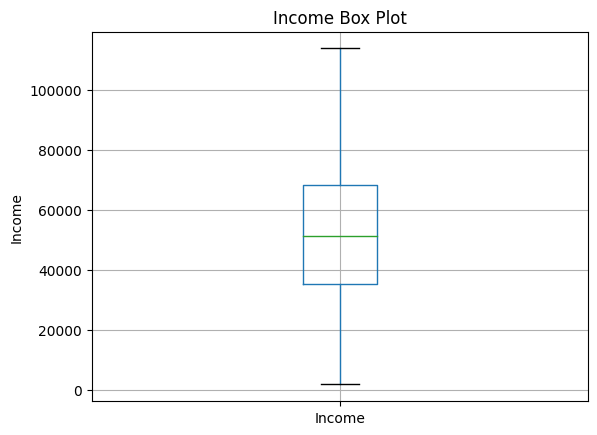

In [14]:
# Plotting a box plot for the 'Income' column
df.boxplot(column=['Income'])
plt.title('Income Box Plot')
plt.ylabel('Income')
plt.show()


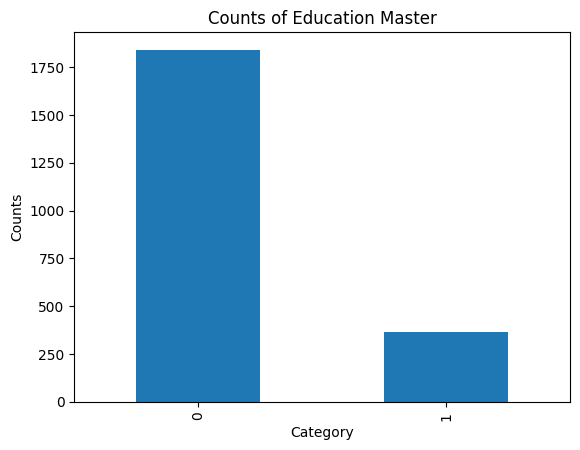

In [15]:
# Counting the values of a categorical column, e.g., 'education_Master'
education_master_counts = df['education_Master'].value_counts()

# Plotting a bar chart
education_master_counts.plot(kind='bar')
plt.title('Counts of Education Master')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.show()


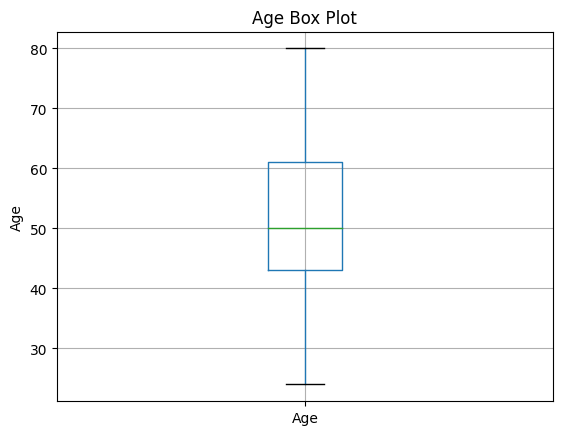

In [16]:
# Plotting a box plot for the 'Income' column
df.boxplot(column=['Age'])
plt.title('Age Box Plot')
plt.ylabel('Age')
plt.show()


In [17]:
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


                        Income   Kidhome  Teenhome   Recency  MntWines  \
Income                1.000000 -0.531699  0.042483  0.006716  0.730495   
Kidhome              -0.531699  1.000000 -0.040207  0.011829 -0.499288   
Teenhome              0.042483 -0.040207  1.000000  0.013881  0.002783   
Recency               0.006716  0.011829  0.013881  1.000000  0.016470   
MntWines              0.730495 -0.499288  0.002783  0.016470  1.000000   
MntFruits             0.537920 -0.374388 -0.176925 -0.004909  0.384947   
MntMeatProducts       0.702500 -0.445665 -0.267177  0.026138  0.593119   
MntFishProducts       0.551758 -0.389895 -0.206371  0.001177  0.395967   
MntSweetProducts      0.555601 -0.379101 -0.164246  0.025535  0.388613   
MntGoldProds          0.417653 -0.356550 -0.019619  0.018558  0.390194   
NumDealsPurchases    -0.132427  0.226434  0.394341  0.000479  0.011858   
NumWebPurchases       0.503184 -0.375590  0.161229 -0.005104  0.552342   
NumCatalogPurchases   0.710057 -0.5198

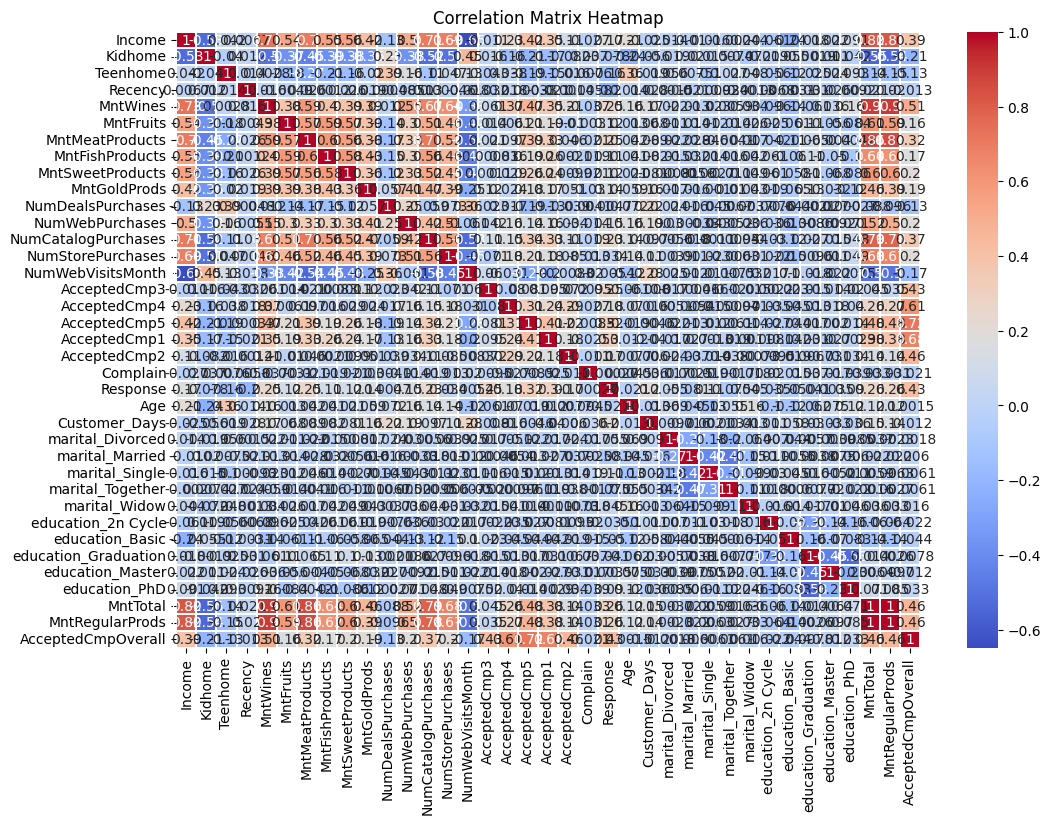

In [18]:
import seaborn as sns

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.1)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [19]:
# Separate numerical and categorical variables
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
categorical_vars = df.select_dtypes(include=['category']).columns

# Generate descriptive statistics for numerical columns
numerical_stats = df[numerical_vars].describe()

# Generate descriptive statistics for categorical columns
categorical_stats = df[categorical_vars].describe()

# Display the results
print(numerical_stats)

              Income      Recency     MntWines    MntFruits  MntMeatProducts  \
count    2205.000000  2205.000000  2205.000000  2205.000000      2205.000000   
mean    51622.094785    49.009070   306.164626    26.403175       165.312018   
std     20713.063826    28.932111   337.493839    39.784484       217.784507   
min      1730.000000     0.000000     0.000000     0.000000         0.000000   
25%     35196.000000    24.000000    24.000000     2.000000        16.000000   
50%     51287.000000    49.000000   178.000000     8.000000        68.000000   
75%     68281.000000    74.000000   507.000000    33.000000       232.000000   
max    113734.000000    99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2205.000000       2205.000000   2205.000000        2205.000000   
mean         37.756463         27.128345     44.057143           2.318367   
std          54.824635         41.130468     51.

In [20]:
print(categorical_stats)

        Kidhome  Teenhome  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count      2205      2205          2205          2205          2205   
unique        3         3             2             2             2   
top           0         0             0             0             0   
freq       1276      1139          2042          2041          2044   

        AcceptedCmp1  AcceptedCmp2  Complain  marital_Divorced  \
count           2205          2205      2205              2205   
unique             2             2         2                 2   
top                0             0         0                 0   
freq            2063          2175      2185              1975   

        marital_Married  marital_Single  marital_Together  marital_Widow  \
count              2205            2205              2205           2205   
unique                2               2                 2              2   
top                   0               0                 0              0   
freq     

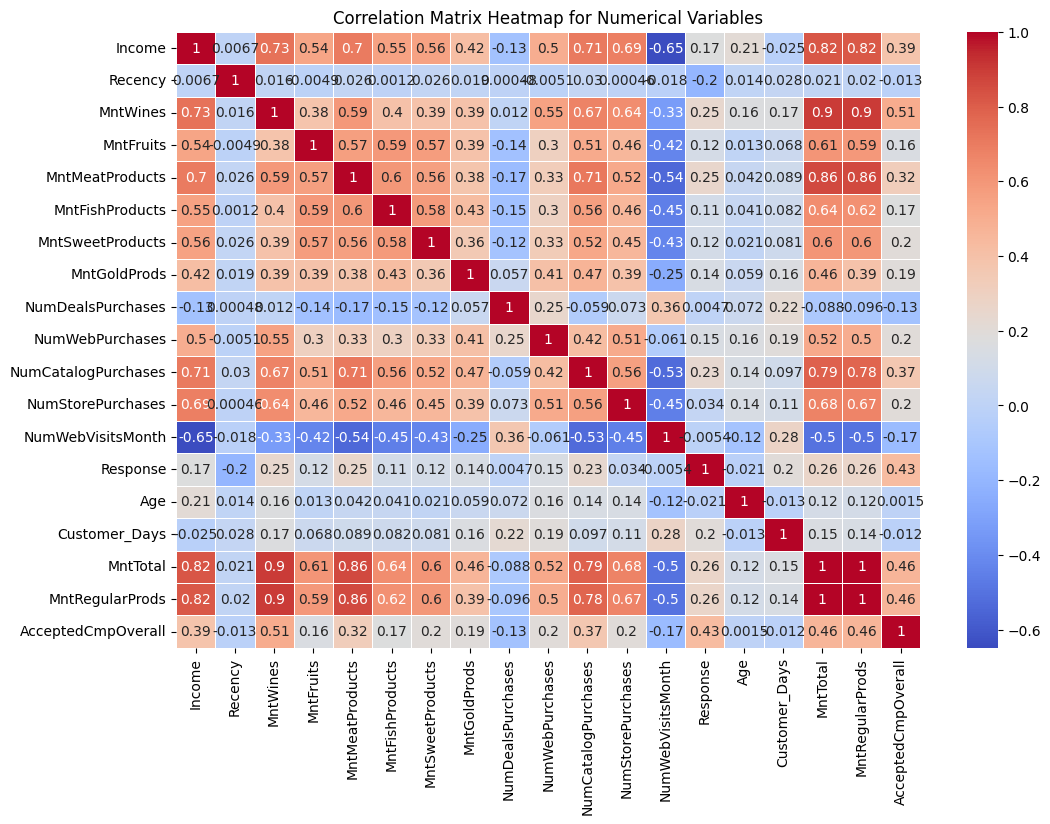

In [21]:

# Compute the correlation matrix for numerical variables
corr_matrix_numerical = df[numerical_vars].corr()

# Plotting the heatmap for numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_numerical, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap for Numerical Variables')
plt.show()

In [22]:
# Creating pairplot for numerical variables
# sns.pairplot(df[numerical_vars])
# plt.show()


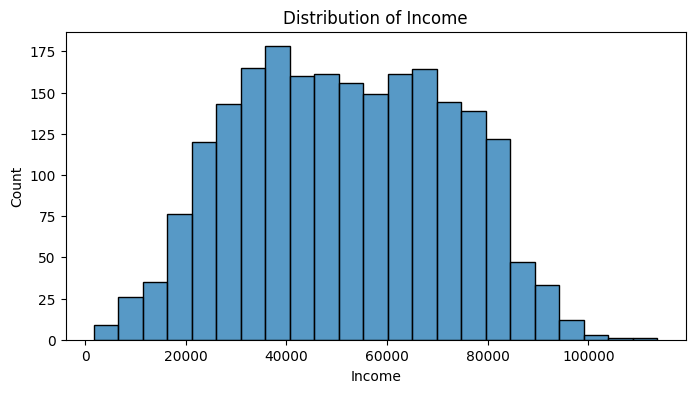

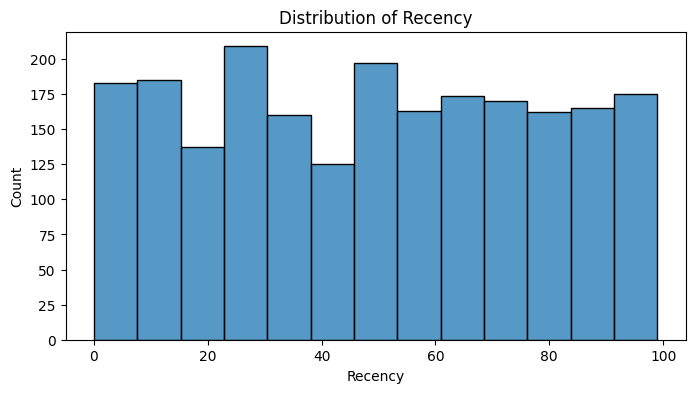

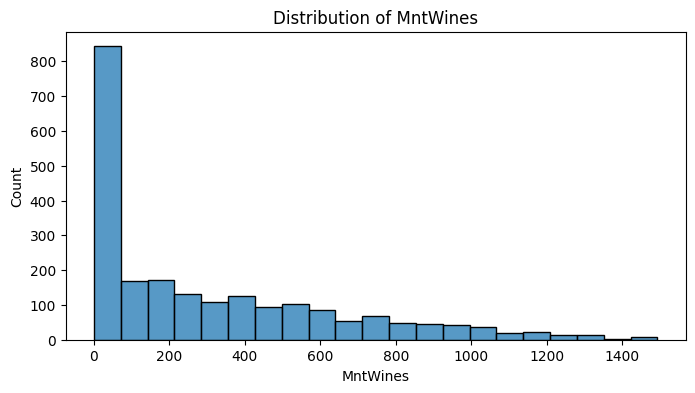

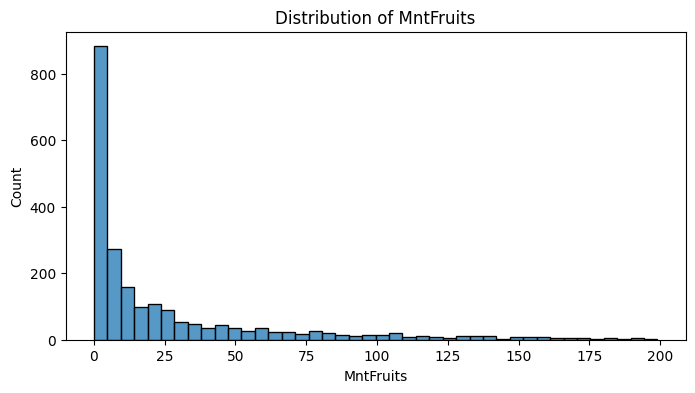

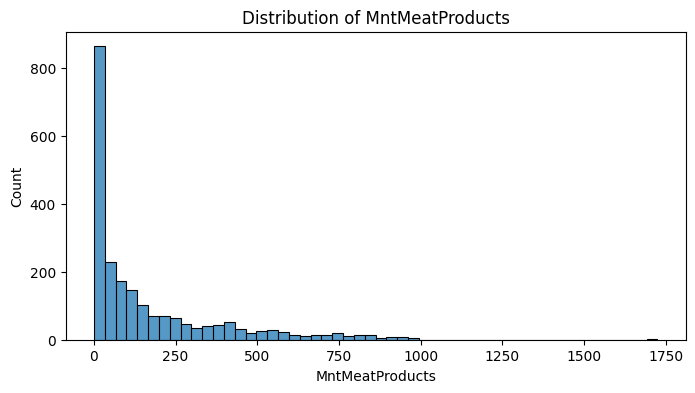

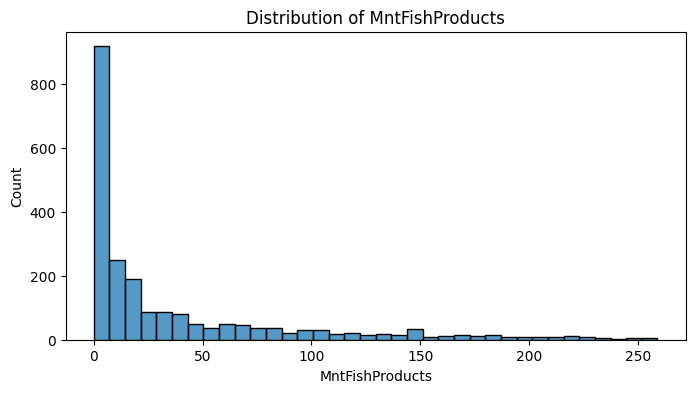

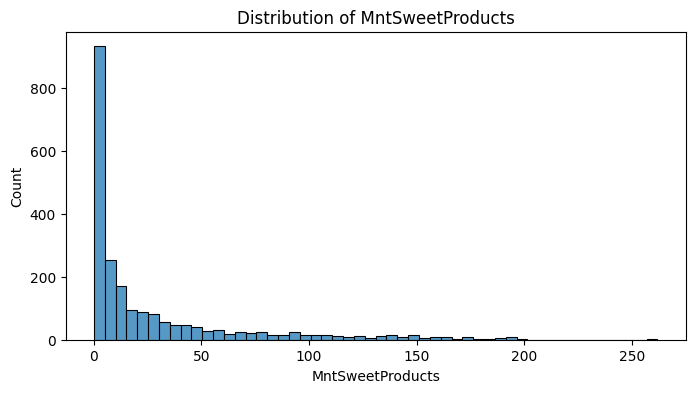

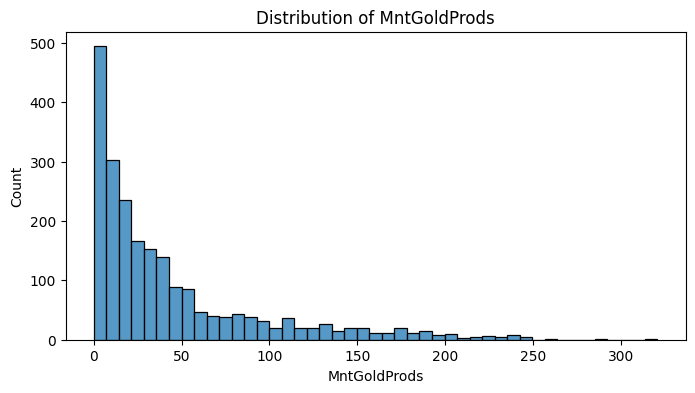

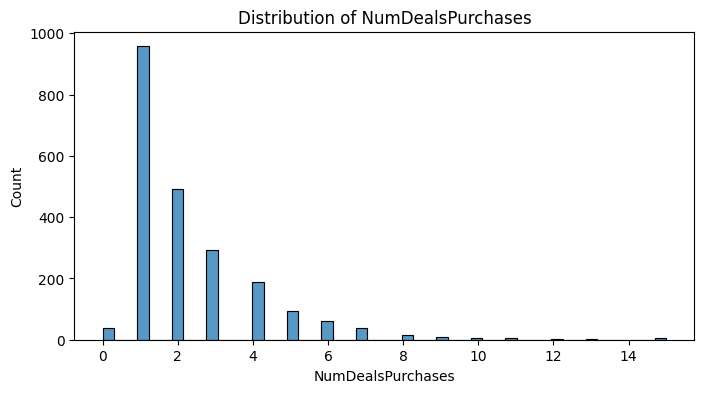

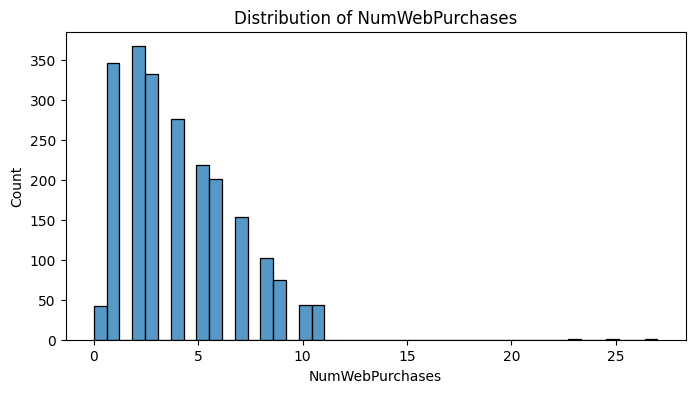

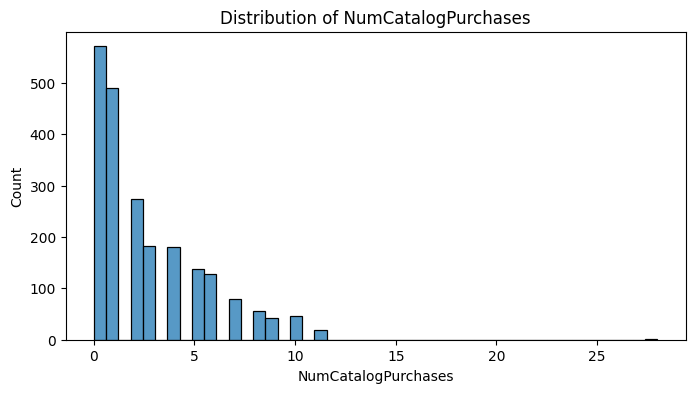

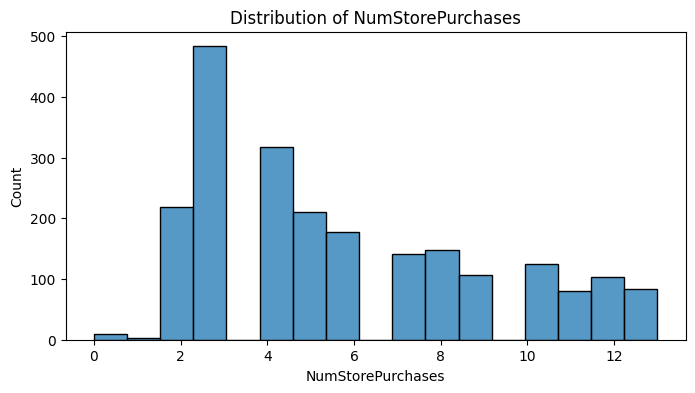

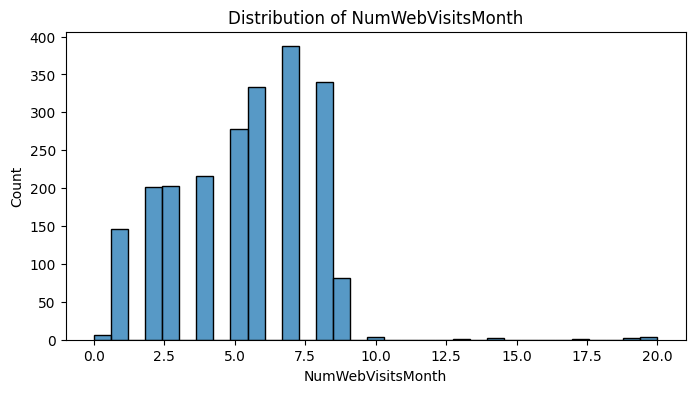

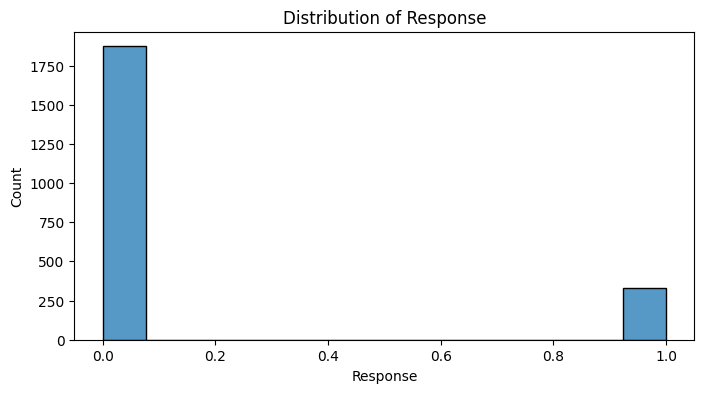

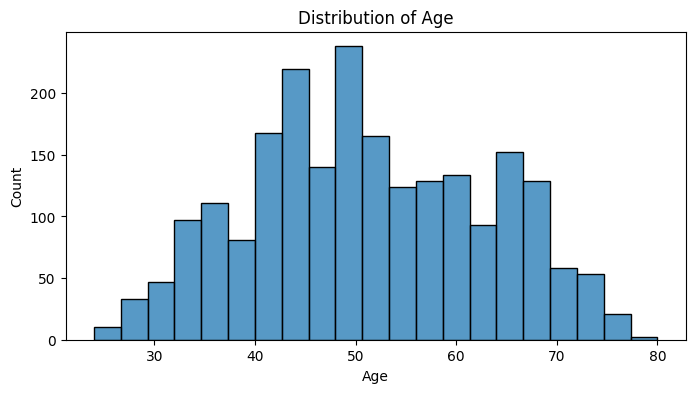

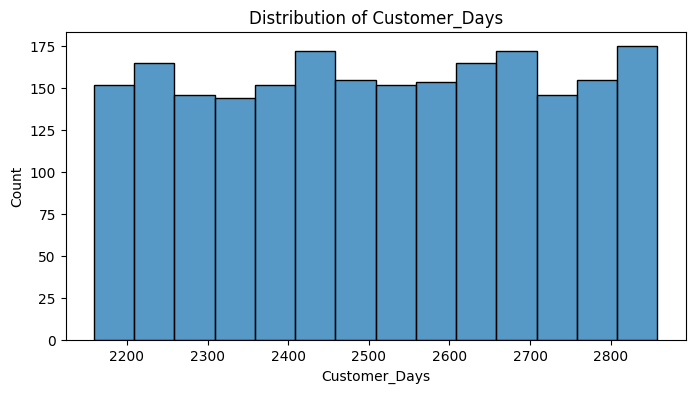

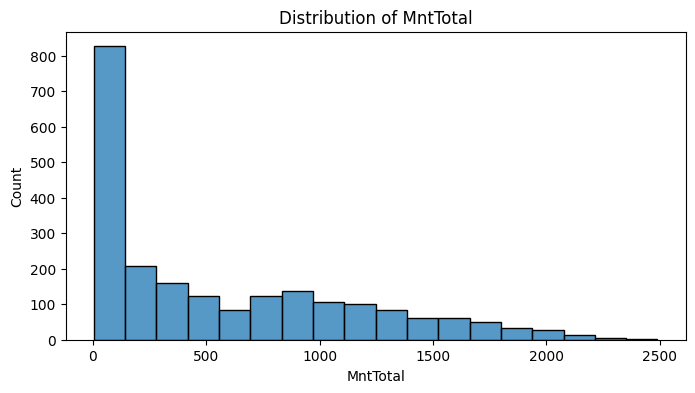

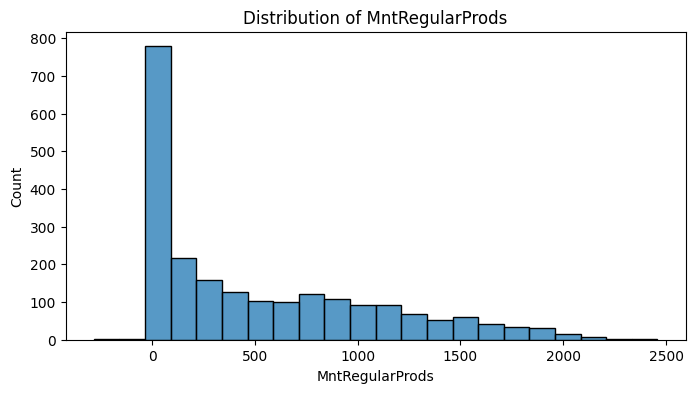

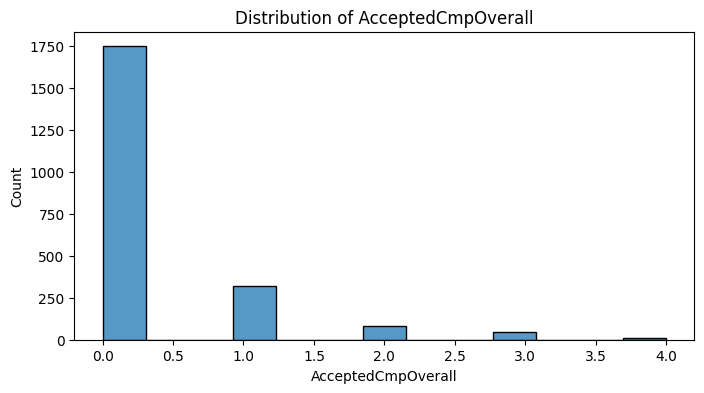

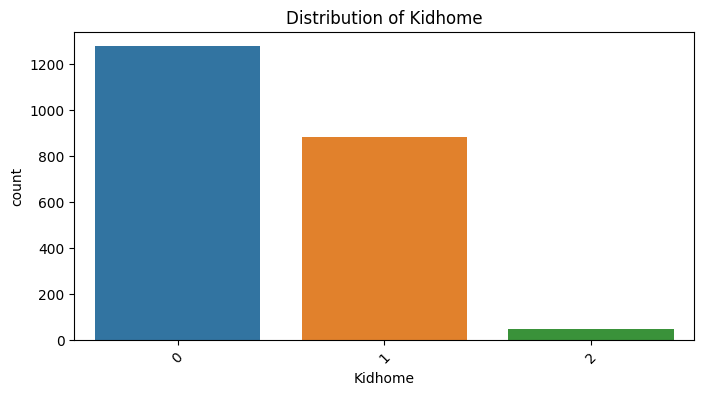

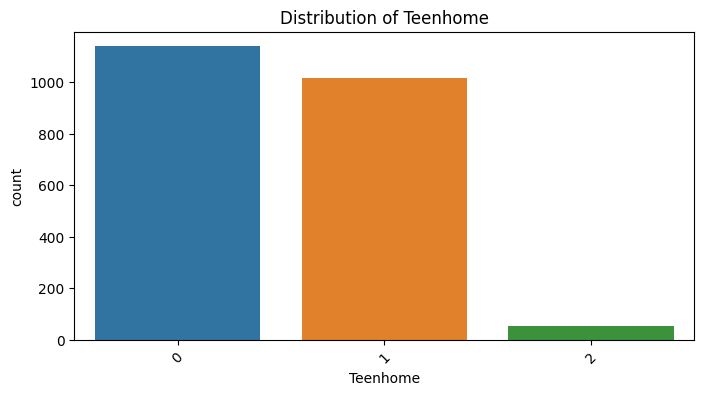

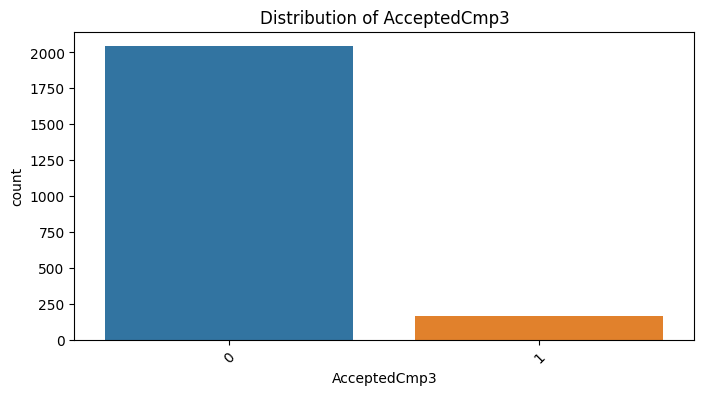

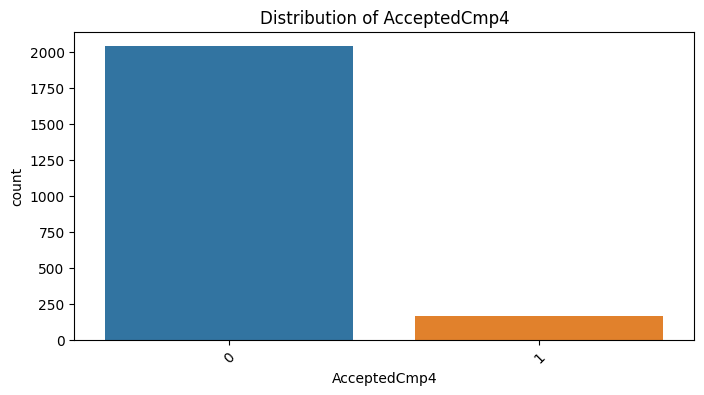

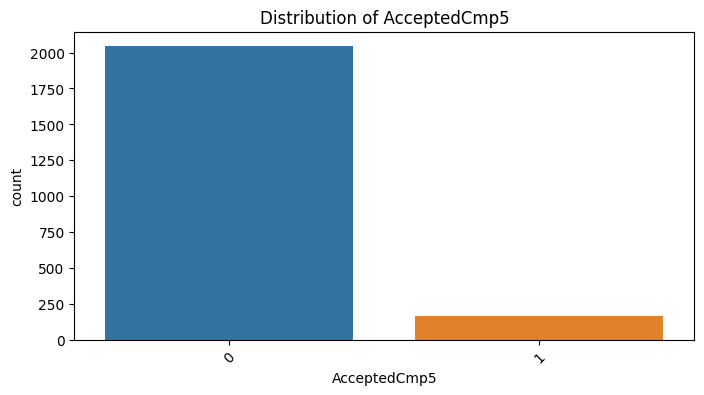

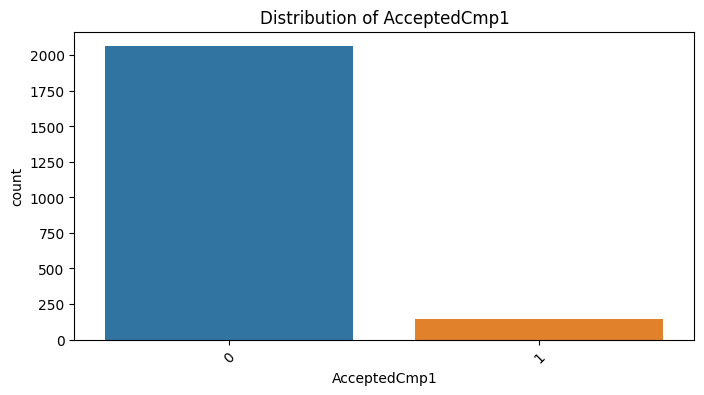

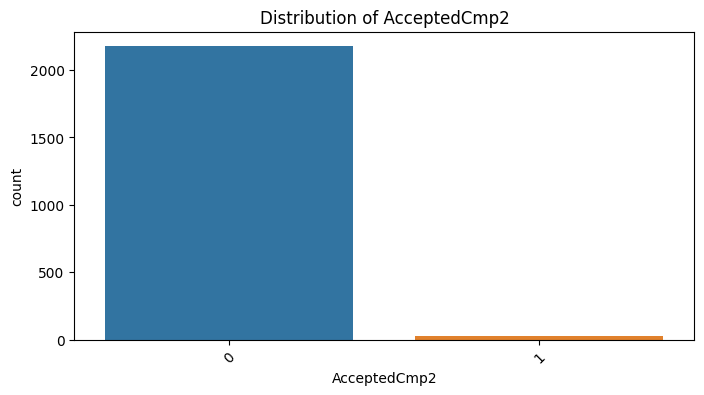

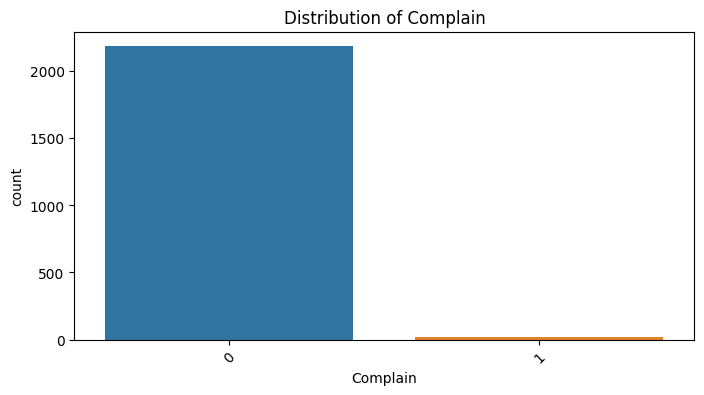

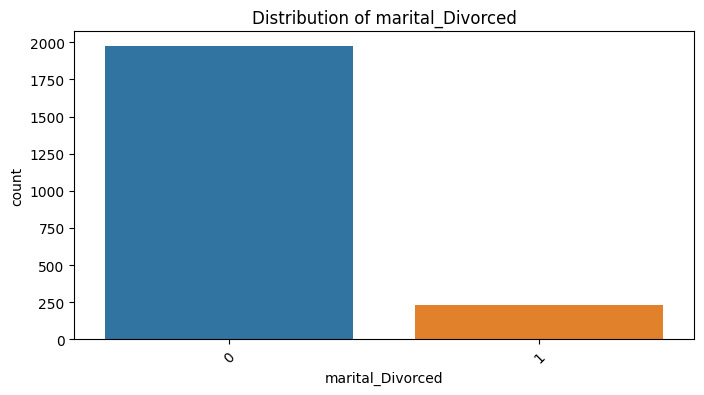

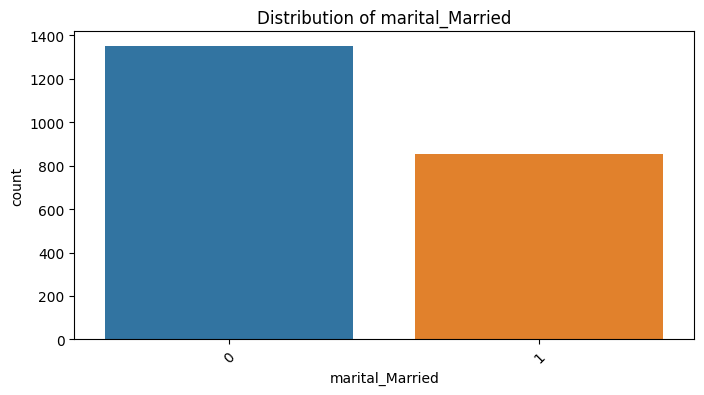

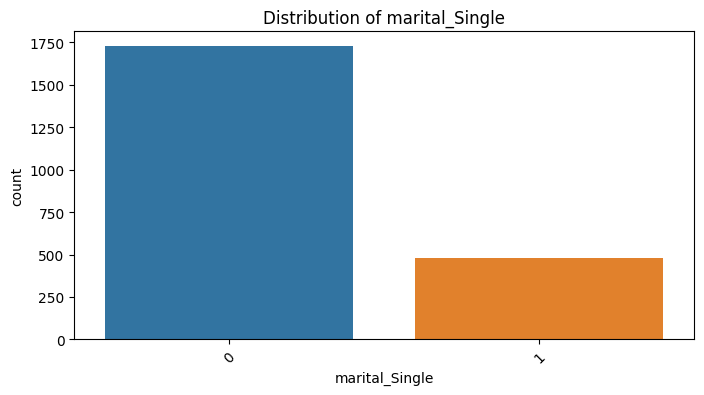

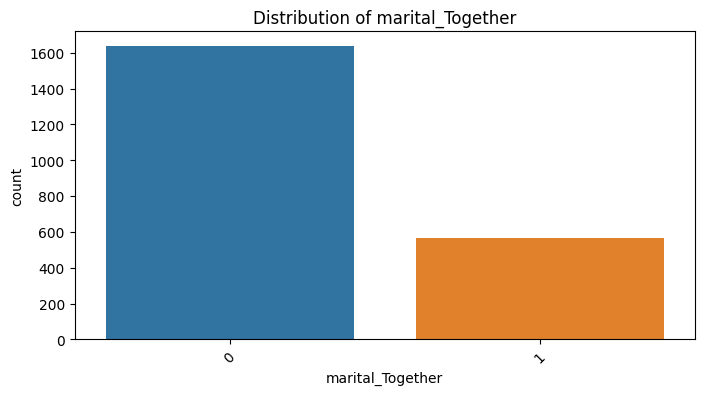

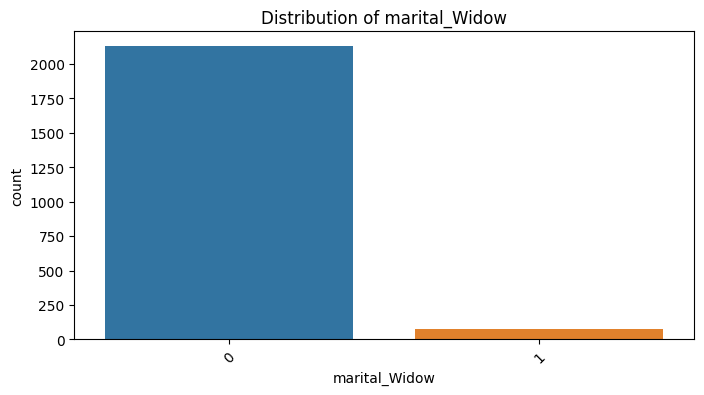

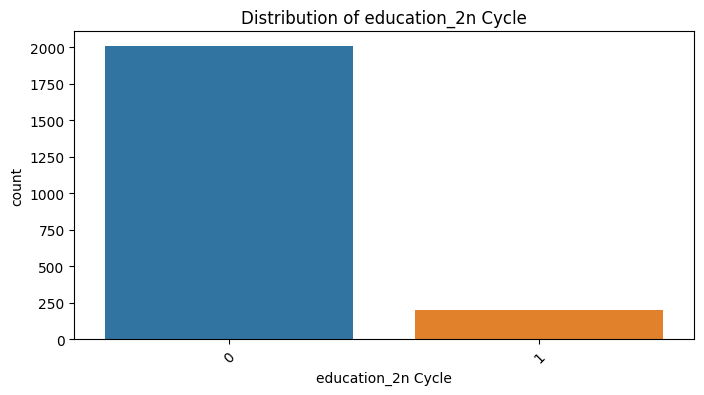

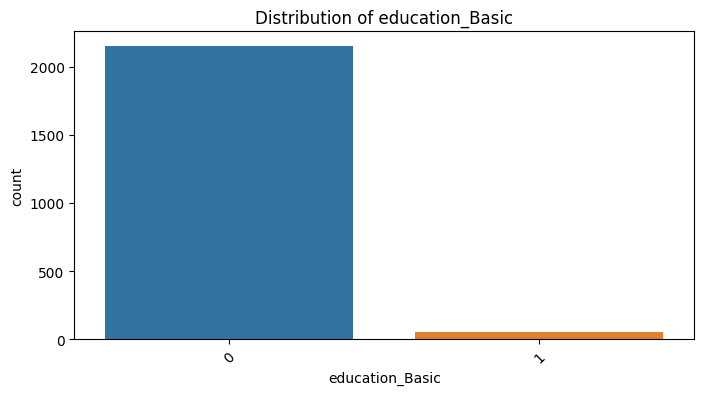

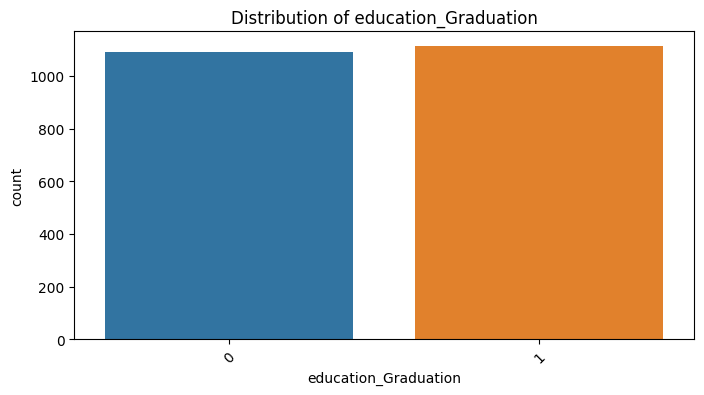

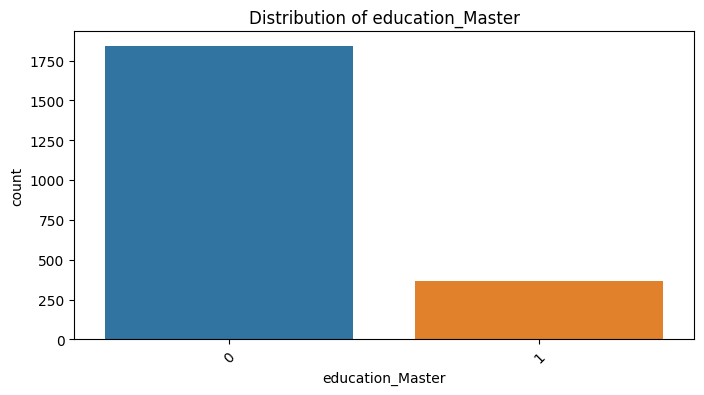

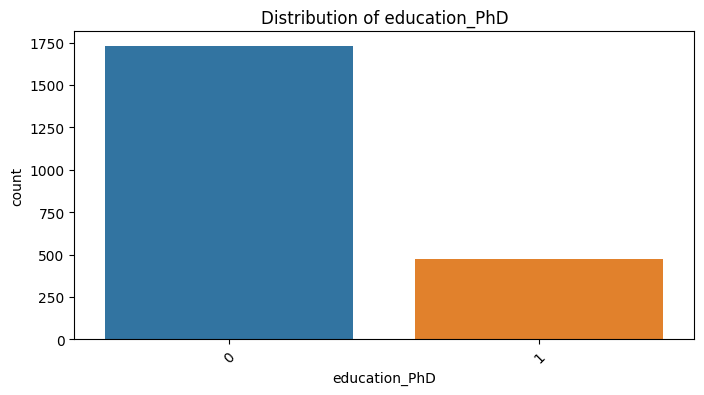

In [23]:
# For numerical variables
for col in numerical_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=False)
    plt.title(f'Distribution of {col}')
    plt.show()

# For categorical variables
for col in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()